In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv('pollution.csv')

In [3]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)
df.set_index(['Date'], inplace = True)
df.head()

,PM2.5,PM10,NOx,SO2,CO,O3
Date,,,,,,
2018-02-01,227.39,445.35,68.75,13.64,1.4,None
2018-02-02,181.58,351.75,69.02,11.03,0.96,None
2018-02-03,152.29,304.04,66.94,14.95,0.86,None
2018-02-04,172.12,301.08,64.92,13.45,0.88,3.13
2018-02-05,210.75,372.96,84.57,16.52,1.04,27.55


In [4]:
for j in df.columns:
    if j != 'Date': 
        for i in range(len(df)):
            if df[j][i] == 'None':
                df[j][i] = None
        df[j] = df[j].astype(float)

C:\Users\prajual pillai\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [5]:
df.describe()

,PM2.5,PM10,NOx,SO2,CO,O3
count,835.000000,837.000000,837.000000,834.000000,836.000000,830.000000
mean,116.835138,231.329928,43.904289,16.461811,1.171866,38.557964
std,95.863825,136.324061,31.828196,7.518800,0.764877,18.045560
min,5.730000,15.530000,3.640000,0.710000,0.000000,1.200000
25%,50.795000,124.730000,19.900000,11.317500,0.630000,25.905000
50%,87.530000,204.730000,38.320000,15.660000,0.965000,37.565000
75%,151.135000,318.210000,56.440000,20.662500,1.442500,49.632500
max,605.260000,934.600000,244.150000,47.310000,5.630000,107.830000


In [6]:
df.fillna(method = 'bfill', inplace = True)
df.describe()

,PM2.5,PM10,NOx,SO2,CO,O3
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,116.802792,231.425513,43.881969,16.458079,1.170358,38.381575
std,95.693462,136.270696,31.815739,7.512628,0.764675,18.213397
min,5.730000,15.530000,3.640000,0.710000,0.000000,1.200000
25%,50.925000,124.740000,19.905000,11.317500,0.630000,25.752500
50%,87.795000,204.840000,38.310000,15.685000,0.960000,37.425000
75%,150.995000,318.022500,56.417500,20.640000,1.440000,49.632500
max,605.260000,934.600000,244.150000,47.310000,5.630000,107.830000


In [7]:
df.head()

,PM2.5,PM10,NOx,SO2,CO,O3
Date,,,,,,
2018-02-01,227.39,445.35,68.75,13.64,1.40,3.13
2018-02-02,181.58,351.75,69.02,11.03,0.96,3.13
2018-02-03,152.29,304.04,66.94,14.95,0.86,3.13
2018-02-04,172.12,301.08,64.92,13.45,0.88,3.13
2018-02-05,210.75,372.96,84.57,16.52,1.04,27.55


In [8]:
df.corr()

,PM2.5,PM10,NOx,SO2,CO,O3
PM2.5,1.000000,0.827221,0.662181,0.102110,0.710675,-0.214393
PM10,0.827221,1.000000,0.629259,0.039583,0.573928,-0.020025
NOx,0.662181,0.629259,1.000000,0.274748,0.697590,-0.144967
SO2,0.102110,0.039583,0.274748,1.000000,0.325772,-0.040224
CO,0.710675,0.573928,0.697590,0.325772,1.000000,-0.108149
O3,-0.214393,-0.020025,-0.144967,-0.040224,-0.108149,1.000000


What we see is that there is close correlation between the PM2.5, PM10, NOx and CO datasets so what we can try to do is that
considering them as variables we can predict the levels of the other correlated data

In [9]:
df1 = df[['PM2.5','PM10','NOx','CO']]
df1.head()

,PM2.5,PM10,NOx,CO
Date,,,,
2018-02-01,227.39,445.35,68.75,1.40
2018-02-02,181.58,351.75,69.02,0.96
2018-02-03,152.29,304.04,66.94,0.86
2018-02-04,172.12,301.08,64.92,0.88
2018-02-05,210.75,372.96,84.57,1.04


according to TERI Delhi's PM2.5 levels are distributed as follows:
1. 30% from idustries: 
    a. power plants - 6%
    b. brick kiln - 3%
    c. stone crushers - 2%
    d. other - 14%
2. 28% from vehicles: 
    a. tractors - 9%
    b. 2 wheelers - 7%
    c. 3 wheelers - 5%
    d. cars - 3%
    e. buses - 3%
    f. commercial vehicles - 1%
3. Agricultural Burning - 4%
4.  17% from Dust: 
    a. Roads - 3%
    b. Construction - 1%
    c. Others - 13%
5. Residential - 10%
6. Others - 11%

In [10]:
df1 = df[['PM2.5']]
df2 = df1['2020-03':]
df3 = df1['2019-03':'2019-05-18']
df4 = df1['2018-03':'2018-05-18']

During the lockdown only power plants were operational, so out of the 30% pollution caused by the industry we assume only 6% was being released during lockdown taking that into consideration we compare the pollution levels of march to may of 2018,2019 and 2020

In [11]:
print(df2.describe())
print(df3.describe())
print(df4.describe())

            PM2.5
count   79.000000
mean    58.455570
std     23.874411
min     23.270000
25%     38.655000
50%     57.190000
75%     71.695000
max    113.730000
            PM2.5
count   79.000000
mean    96.875696
std     30.087560
min     22.730000
25%     80.475000
50%     96.220000
75%    111.325000
max    174.840000
            PM2.5
count   79.000000
mean   106.449873
std     35.209266
min     49.930000
25%     84.225000
50%    103.460000
75%    128.200000
max    218.170000


We note that the mean value has severly decreased from the earlier values of 106, 96 to 58 and the most prominent value is the max value whuch has decreased from upwards of 170 to about the mean values of the years before

In [12]:
dec1 = abs(df2.mean() - df3.mean())/df3.mean()
dec1*100

PM2.5    39.6592
dtype: float64

In [13]:
dec2 = abs(df2.mean() - df4.mean())/df4.mean()
dec2*100

PM2.5    45.086295
dtype: float64

Therefore we see that the decrease in the mean itself is over 30% which would be due to the closure of other industries and majority vehicle movement. In order to verify it we try to predict the value of this year's march-may pollution level by altering the 2018,2019 data in a way that only power plant pollution and assuming some vehicular movement is allowed for essential services. 

Thus 6% for power plant and lets take out of the 28% of vehicles that were active 5% were used for essential services.
Agricutltural burning only starts in the last week of may mostly so we can neglect it.
The dust and residential will be considered as unaltered.
The other factors will also be considered as it is, so finally we plan to take the 11% of the earlier 58% pollution and see the affects.

In [14]:
df5 = df3*0.53
df6 = df4*0.53

In [15]:
print(df5.describe())
print(df6.describe())
print(df2.describe())

           PM2.5
count  79.000000
mean   51.344119
std    15.946407
min    12.046900
25%    42.651750
50%    50.996600
75%    59.002250
max    92.665200
            PM2.5
count   79.000000
mean    56.418433
std     18.660911
min     26.462900
25%     44.639250
50%     54.833800
75%     67.946000
max    115.630100
            PM2.5
count   79.000000
mean    58.455570
std     23.874411
min     23.270000
25%     38.655000
50%     57.190000
75%     71.695000
max    113.730000


We see that the values are now much more relatable to this year's value which suggests that our approximations are not that far off and the lockdowndown has in effect stopped the pollutants rising from the vehicular and industrial areas.

So if the lockdown were to end and activities are continued as normal the pollution levels of PM2.5 would shoot up again.

We will now try forecasting the values post lockdown.
But this forecast may not be accurate as there is a lack of pollution data in India and the factors that contribute to the increase have not been documented in a manner that we can accurately predict the resulting effects.

# Forecasting

We will try two approaches for forecating.
1. Time series analysis using SARIMAX
2. Regression approach where we will try to predict the PM2.5 levels based on the level of other pollutants in the atmosphere.

I am using SARIMAX model as ARIMA and ARMA model were not giving satisfactory results

# 1. Regression Analysis

I will be using support vector regression for analysis.

In [16]:
from sklearn.svm import SVR as svr
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [17]:
df7 = df['2018-03':'2018-05-18']
df7 = df7.append(df['2019-03':'2019-05-18'])

In [18]:
df8 = df['2020-03':'2020-05-18']
df8 = df8.reset_index()
df8.drop(['Date'],axis=1,inplace = True)
yte = df8['PM2.5']
xte = df8.drop(['PM2.5'],axis = 1)
xte = xte.drop(['CO'],axis=1)
df8.head()

,PM2.5,PM10,NOx,SO2,CO,O3
0,56.52,105.03,38.09,17.71,0.85,32.19
1,109.10,215.92,77.35,20.44,1.07,25.90
2,80.92,177.45,50.41,19.38,0.69,22.08
3,82.71,170.80,40.13,21.38,0.67,33.30
4,39.23,65.27,23.56,14.17,0.56,28.59


In [19]:
df7 = df7.reset_index()

In [20]:
df8.shape

(79, 6)

In [21]:
df7.drop(['Date'],axis=1,inplace = True)
df7.head()

,PM2.5,PM10,NOx,SO2,CO,O3
0,150.44,310.76,58.62,7.75,0.87,39.64
1,180.50,305.17,54.22,5.59,1.35,51.15
2,126.50,276.04,35.66,5.44,0.74,41.28
3,91.58,213.88,39.41,9.92,0.58,39.74
4,90.74,189.57,46.02,9.91,0.49,41.45


In [22]:
y = df7['PM2.5']
x = df7.drop(['PM2.5'],axis = 1)

In [23]:
x.corr()

,PM10,NOx,SO2,CO,O3
PM10,1.000000,0.090437,-0.302129,-0.033311,0.137873
NOx,0.090437,1.000000,0.401465,0.449287,-0.398250
SO2,-0.302129,0.401465,1.000000,0.650427,-0.467077
CO,-0.033311,0.449287,0.650427,1.000000,-0.374348
O3,0.137873,-0.398250,-0.467077,-0.374348,1.000000


In [24]:
x = x.drop(['SO2'],axis=1)

In [25]:
#from sklearn.model_selection import train_test_split
#xtr,xte,ytr,yte = train_test_split(x,y,test_size = 0.3, random_state =1)

In [26]:
regr = make_pipeline(StandardScaler(),svr(C=1.0,epsilon=0.2))
regr.fit(x,y)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svr',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
                     gamma='scale', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [27]:
y_pred1 = regr.predict(xte)
y_pred2 = regr.predict(x)

In [28]:
regr.score(xte,yte)

-3.2349013266902378

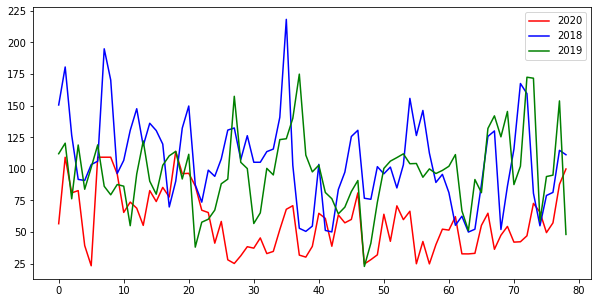

In [32]:
plt.figure(figsize = (10,5))
plt.plot(yte,color='r',label = '2020')
plt.plot(y.iloc[0:79],color='b',label = '2018')
y2 = (y[79:158]).reset_index()
y2.drop(['index'],axis=1,inplace=True)
plt.plot(y2,color='g',label = '2019')
plt.legend()

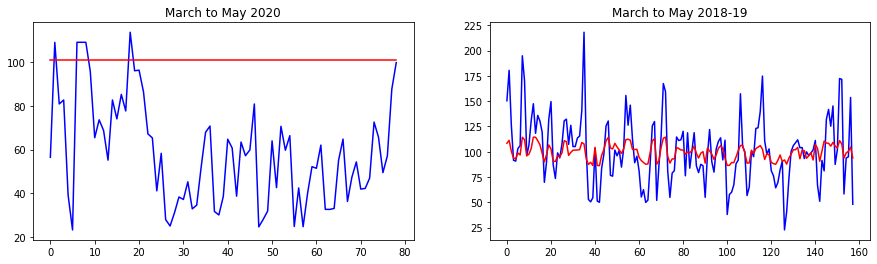

In [33]:
fig,ax = plt.subplots(1,2,figsize=(15,4))
ax[0].set_title('March to May 2020')
ax[0].plot(yte,color='b')
ax[0].plot(y_pred1,color='r')
ax[1].set_title('March to May 2018-19')
ax[1].plot(y,color='b')
ax[1].plot(y_pred2,color='r')

We see that the regression line that we had modeled on the basis of the data from march to april 2018,2019 fails to depict the trend of the data that has occured during the lockdown.
But it outlines the mean of what we would have seen if a lockdown had not occured.

# 2. Time Series Analysis

# Performing Dicky Fuller test to find if model is stationary/non-stationary

In [34]:
from statsmodels.tsa.stattools import adfuller
tsr = adfuller(df['PM2.5'])
print('p-value of the test ',tsr[1])

p-value of the test  0.005419168964139948


We split the data into pre and post lockdown

In [35]:
yr = df['2018':'2020-02']
yr1 = df['2020-03':'2020-05']

In [36]:
df1 = pd.DataFrame(yr['PM2.5'])
df1.head()

,PM2.5
Date,
2018-02-01,227.39
2018-02-02,181.58
2018-02-03,152.29
2018-02-04,172.12
2018-02-05,210.75


As we see that the dicky fuller test showed a value smaller than 0.05, but we still use differencing method on the dataset as it shows to give out better results. 
The shift for the differencing is a hyperpearameter that we conclude upon after experimental analysis.
So we start with the value of 2.

In [37]:
df1['diff'] = df1['PM2.5'] - df1['PM2.5'].shift(2)
tr = adfuller(df1['diff'].dropna())    # .dropna used for droping NaN values
print('The new p-value is: ',tr[1])

The new p-value is:  1.209516301575487e-12


The new p-value is lower than 0.05 therefore now our data has become stationary

### Graphical representation of data before and after becoming stationary

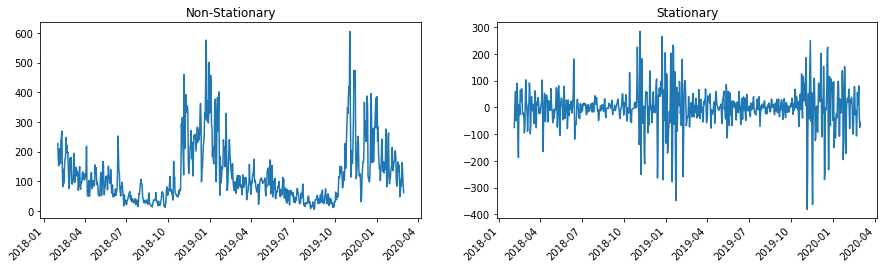

In [38]:
fig,axs = plt.subplots(1,2,figsize = (15,4))
fig.autofmt_xdate(rotation=45)
axs[1].set_title('Stationary')
axs[1].plot(df1['diff'])
axs[0].set_title('Non-Stationary')
axs[0].plot(df1['PM2.5'])


Now for time series analysis using SARIMAX we require the p and q values.
With p being the AR model lag and q being the MA model lag

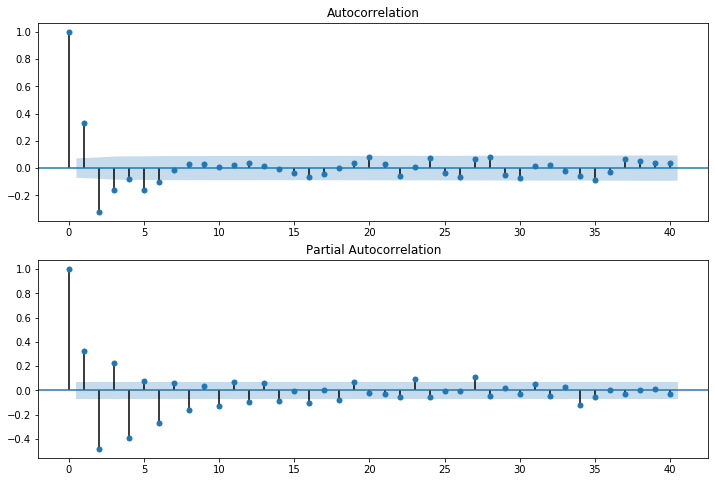

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1['diff'].dropna(), lags = 40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1['diff'].dropna(), lags = 40, ax=ax2)

So the autocorrelation lag(q) comes around 8 and the partialautocorrelation lag(p) value around 8 and as the differencing value cannot be smaller than the value of p,q we assume d to be 12.

In [40]:
model1 = sm.tsa.statespace.SARIMAX(df1['PM2.5'], order = (8,1,8), seasonal_order = (8,1,8,12))
result = model1.fit()

C:\Users\prajual pillai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\prajual pillai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\prajual pillai\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


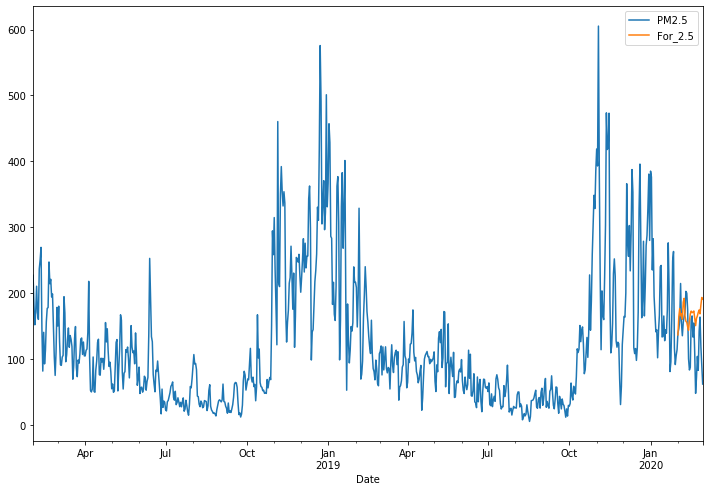

In [41]:
df1['For_2.5'] = result.predict(start = 730, end = 759, dynamic = True)
df1[['PM2.5','For_2.5']].plot(figsize = (12,8))
plt.show()

The prediction looks fairly accurate for the selected region, considering that we didn't have enough data and now we will use this data to predict the pollution level in the month of May and compare it with the actual data.

In [42]:
from pandas.tseries.offsets import DateOffset
fut = [df1.index[-1]+ DateOffset(months=x) for x in range(0,4)]

In [43]:
y_pred = result.predict(start = fut[0], end = fut[3], dynamic = True)

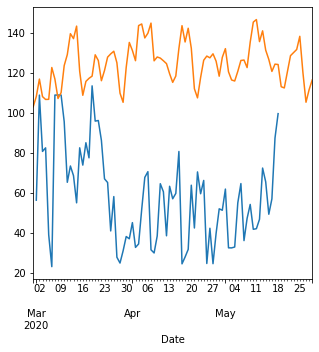

In [44]:
plt.figure(figsize=(5,5))
yr1['PM2.5'].plot()
y_pred.plot()

As we observe the predicted and actual values are way off due to the sudden change in the pollution emissions which could not be factored in earlier.
But what if we compare this to the months of April to May of the years 2018, 2019.

In [45]:
yr2 = df['2018-03':'2018-05']
yr3 = df['2019-03':'2019-05']
fut1 = pd.date_range(start = '2018-03-01', end = '2018-05-30')
fut2 = pd.date_range(start = '2019-03-01', end = '2019-05-30')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


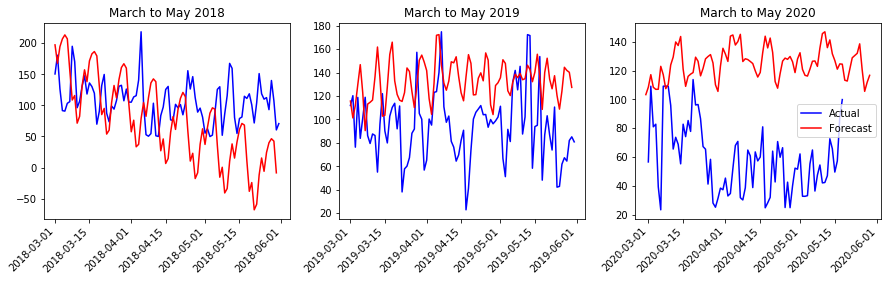

In [46]:
fig,ax = plt.subplots(1,3,figsize=(15,4))
fig.autofmt_xdate(rotation=45)

y_pred = result.predict(start = fut1[0], end = fut1[90], dynamic = True)
ax[0].set_title('March to May 2018')
ax[0].plot(yr2['PM2.5'],color='b',label = 'Actual')
ax[0].plot(y_pred,color='r',label = 'Forecast')
plt.legend()

y_pred = result.predict(start = fut2[0], end = fut2[90], dynamic = True)
ax[1].set_title('March to May 2019')
ax[1].plot(yr3['PM2.5'],color='b',label = 'Actual')
ax[1].plot(y_pred,color='r',label = 'Forecast')
plt.legend()

y_pred = result.predict(start = fut[0], end = fut[3], dynamic = True)
ax[2].set_title('March to May 2020')
ax[2].plot(yr1['PM2.5'],color='b',label = 'Actual')
ax[2].plot(y_pred,color='r',label = 'Forecast')
plt.legend()

We observe that the trend is somewhat followed for the years 2018,2019 but is an absolute mismatch for the year 2020.
Thus another model will have to be prepared for the upcoming few months using the months of March-May of the year 2020.
But this model that we will create will be mostly in accurate as the exact date for the lockdown extensions and the transportation and industry allowances that will be provided is still unknown.

# Making a model for the next three months based on the data of the two and a half months of lockdown

In [241]:
model1 = sm.tsa.statespace.SARIMAX(yr1['PM2.5'], order = (8,1,8), seasonal_order = (8,1,8,12))
result = model1.fit()

C:\Users\prajual pillai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\prajual pillai\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\prajual pillai\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\prajual pillai\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Now predicting for the next three months

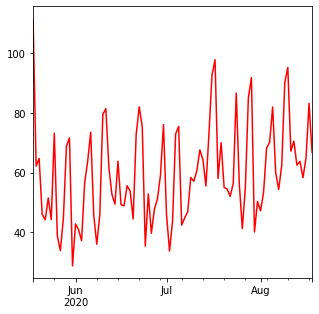

In [243]:
fut3 = [yr1.index[-1]+ DateOffset(months=x) for x in range(0,4)]
y_pred = result.predict(start = fut3[0], end = fut3[3], dynamic = True)
plt.figure(figsize=(5,5))
y_pred.plot(color ='r')

# Conclusion:
1. The above prediction is what we were able to arrive for the next three months using the data from the months of March to May 18th.
2. We can combine both the approaches by first using the time series method to predict each pollutant level and then using the regression method to predict the level of PM2.5.
3. But this will only result in the errors being compunded as the lack of data is not giving us a clear result right now.